# Guia 3

## Ejercicio 3

Calcule el error cuadrático total de aproximación en el ejemplo con funciones de Legendre bajo las siguientes condiciones:
1. con los coeficientes calculados en el ejemplo,
2. con pequeñas variaciones en torno a estos coeficientes $\alpha$, construyendo una gráfica en 3D con la variación en los coeficientes en $x$, $y$ y el error cuadrático total en $z$,
3. con más coeficientes $\alpha$, para comprobar cómo se reduce el error cuadrático total al aumentar los coeficientes.

### Error cuadrático total

El _error cuadrático total_ se define como
$$
    \epsilon = ||e||^2_2 = ||y-\~{y}||^2_2
$$

### Solución 3-1

Para aproximar las función $y(t)$ vamos a usar las funciones de Legendre, ortonormales en el intervalo $[-1,1]$
$$
y(t) = 
    \begin{cases}
        -1  &\quad \forall t < 0\\
        1   &\quad \forall t >= 0 \\
    \end{cases}
$$
La n-esima función de Legendre tiene la forma
$$
\phi_n (t) = \sqrt{\frac{2n+1}{2}} \frac{1}{2^n n!} \frac{d^n}{dt^n} (t^2-1)^n
$$
Calculando los coeficientes para aproximar $y(t)$ con las primeras 4 funciones de Legendre, obtenemos
$$
\begin{align*}
    \alpha_0 &= <y,\phi_0> = \int_{-1}^{1} \sqrt{\frac{1}{2}}y(t)dt=0\\
    \alpha_1 &= <y,\phi_1> = \int_{-1}^{1} \sqrt{\frac{3}{2}}ty(t)dt = \sqrt{\frac{3}{2}}\\
    \alpha_2 &= <y,\phi_2> = \int_{-1}^{1} \sqrt{\frac{5}{2}}\left( \frac{3}{2}t^2 - \frac{1}{2} \right)y(t)dt = 0\\
    \alpha_3 &= <y,\phi_3> = \int_{-1}^{1} \sqrt{\frac{7}{2}}\left( \frac{5}{2}t^3 - \frac{3}{2}t \right)y(t)dt = - \sqrt{\frac{7}{32}}
\end{align*}
$$
Por lo que podemos aproximar $y(t)$ como
$$
\begin{align*}
    y(t) &\approx <y,\phi_1> \phi_1(t) + - <y,\phi_3> \phi_3(t)\\
         &= \sqrt{\frac{3}{2}} \left( \sqrt{\frac{3}{2}}t \right) + \left( -\sqrt{\frac{7}{32}} \right) \left( \sqrt{\frac{7}{2}} \left( \frac{5}{2}t^3 -\frac{3}{2}t \right) \right)\\
         &= \frac{45}{16}t - \frac{35}{16}t^3
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ECT(y,yapprox):
    """
        Error cuadratico total entre y y su aproximacion.\\
        Se define como la norma 2 al cuadrado de la diferencia de las seniales, pero por optimizacion y para evitar error de redondeo lo hacemos directamente como la suma de los cuadrados de la diferencia
    """
    if(len(y) != len(yapprox)):
        raise Exception("las seniales no tienen el mismo tamanio")

    return np.sum(np.power(y-yapprox,[2]*len(y)))

def yreal(t):
    """funcion real y(t) donde t<0 => y(t)=-1, si no y(t)=1"""
    return np.where(np.less(t,[0]*len(t)),-1,1)

def yapprox(t):
    """funcion aproximante de y con los primeros cuatro polinomios de Legendre"""
    frac1 = 45.0/16.0
    frac2 = 35.0/16.0
    return frac1*t - frac2*np.power(t,[3]*len(t))

def yapproxvar(t,alpha,beta):
    """aproximacion de y con polinomios de Legendre con variacion alpha y beta de las constantes"""
    frac1 = (45.0/16.0) + alpha
    frac2 = (35.0/16.0) + beta
    return frac1*t - frac2*np.power(t,[3]*len(t))

Prueba

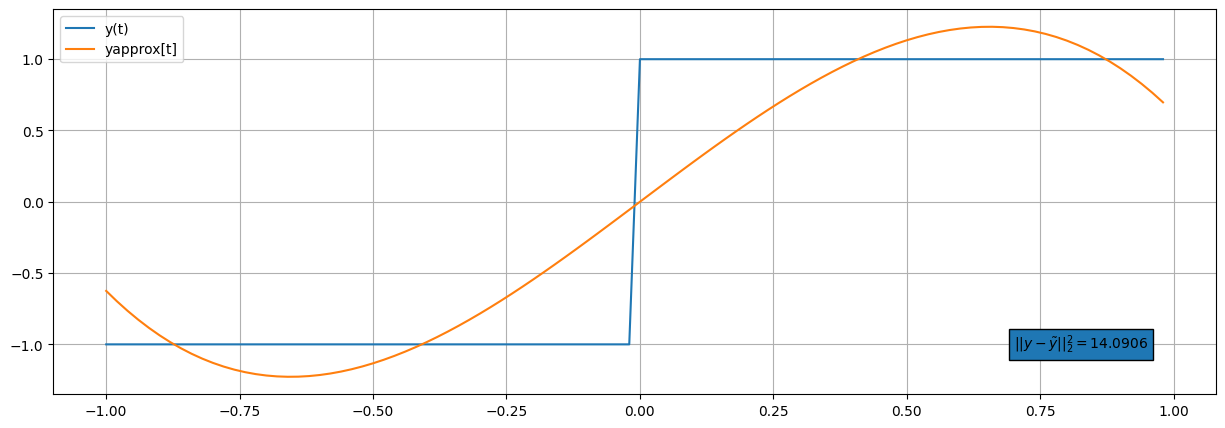

In [2]:
# Parametros
Tini = -1
Tfin = 1
fm = 50

# Calculo
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
s = [yreal(t), yapprox(t)]

# Graficar
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(15)

ax.grid()
ax.plot(t,s[0],label="y(t)")
ax.plot(t,s[1],label="yapprox[t]")
ax.text(0.7,-1, "$ ||y - \\~{y} ||^2_2 = %.4f $ " % ECT(s[0],s[1]), fontsize=10, va='center',
        bbox=dict(boxstyle='square'))
ax.legend()

plt.show()

### Solucion 3.2


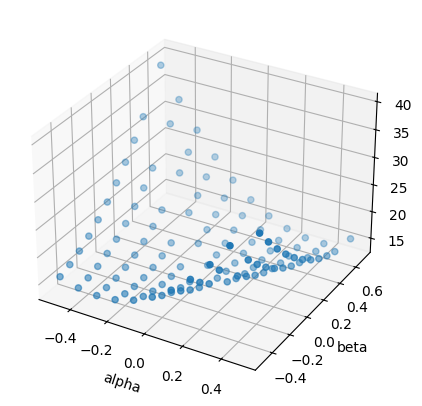

In [3]:
# Parametros
Tini = -1
Tfin = 1
fm = 50

# y original
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
y = yreal(t)

# Calculo de errores
alpha = [[0] for _ in range(121)]
beta = [[0] for _ in range(121)]
e = [[0] for _ in range(121)]
for i in range(121):
    # senial aproximante
    alpha[i] = (i%11-5)*0.1
    beta[i] = (int(i/10.0)-5)*0.1
    s = yapproxvar(t,alpha[i],beta[i])
    # error
    e[i] = ECT(y,s)

# Graficar
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_figheight(5)
fig.set_figwidth(15)

ax.scatter(alpha,beta,e)

ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('error')

plt.show()

### Solucion 3.3

Para agregar mas coeficientes debemos tener mas polinomios de Legendre. Para esto programaremos un funcion que el polinomio de Legendre de grado n y su respectivo coeficiente para nuestra señal de interes.

Vamos a calcular las señal con 4 a 12 coeficientes, con sus correspondientes errores. Descartamos los casos con numero impar de polinomios ya que este ultimo coeficiente seria 0 por lo que la funcion es igual a la inmediata anterior

In [ ]:
from scipy.integrate import fixed_quad

def yapproxgrado(t,n):
    """
        Calcula la aproximacion con n polinomios de Legendre. Numpy proporciona el k-polinomio de Legendre y con SciPy nos permite realizar la cuadratura de Gauss-Legendre para calcular la integral.

        De ChatGPT. https://chatgpt.com/share/6813e7cf-ced0-8003-a4f3-37a6e6200b03
    """
    def y(t):
        return np.where(t < 0, -1, 1)

    # Compute Legendre coefficients
    a = []
    for k in range(n):
        Pk = np.polynomial.legendre.Legendre.basis(k)

        # Integrate y(t) * Pk(t) over [-1, 1]
        integrand = lambda x: y(x) * Pk(x)
        coef, _ = fixed_quad(integrand, -1, 1, n=200)
        ak = (2 * k + 1) / 2 * coef
        a.append(ak)

    # Build the approximation: sum a_k * P_k(t)
    y_approx = np.zeros_like(t, dtype=float)
    for k, ak in enumerate(a):
        Pk = np.polynomial.legendre.Legendre.basis(k)
        y_approx += ak * Pk(t)
    
    return y_approx

# Parametros
Tini = -1
Tfin = 1
fm = 50

# Calculo
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
y = yreal(t)
s = [[0] for _ in range(5)]
e = [[0] for _ in range(5)]
for i in range(5):
    # calculo de senial aproximante de grado i+5
    s[i] = yapproxgrado(t,2*i+4)
    # error
    e[i] = ECT(y,s[i])

# Graficar
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(15)

ax.grid()
ax.plot(t,y,label="y(t)")
color = ['#59DE94', '#9E6B67', '#DE6459', '#648975', '#5E5655']
for i in range(5):
    ax.plot(t,s[i],label="$\\~{y}_{" + str(2*i+4) + "}[t]$", color=color[i%5])
    ax.text(0.7,-1+i*0.25, "$ ||y - \\~{y}_{" + str(2*i+4) + "} ||^2_2 = %.4f $ " % e[i], fontsize=10, va='center',
            bbox=dict(boxstyle='square', color=color[i%5]))

ax.legend()

plt.show()